In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
from theano import shared
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
#Logistic Regression:
size=1000
x = np.random.uniform(0,1,size)

def gen_y(X):
    y = []
    for n in range(len(X)):
        if X[n] > (0.7 + np.random.normal(0,0.001,1)[0]):
            y.append(1.0)
        else:
            y.append(0.0)
    return y

obs_y = gen_y(x)
x_shared = shared(x)

Text(0, 0.5, 'Y')

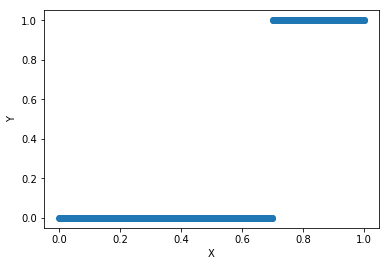

In [18]:
plt.plot(x,obs_y,"o")
plt.xlabel("X")
plt.ylabel("Y")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coeff]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 16000/16000 [00:24<00:00, 643.76draws/s]


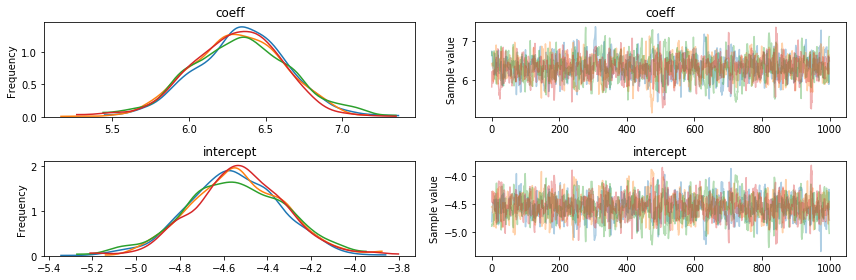

In [7]:
#Model

with pm.Model() as ex:
    coeff = pm.Normal('coeff', 0,.5)
    intercept = pm.Normal('intercept', 0,1)
    
    prob  = pm.invlogit(coeff*x_shared + intercept)
    y = pm.Bernoulli('y', p=prob, observed=obs_y)
    
    trace = pm.sample(1000, tune=3000)
    
    pm.traceplot(trace,['coeff', 'intercept'])
    plt.show()

In [13]:
Test_size = 3000
X_test = np.random.uniform(0,1,Test_size)
Y_test = gen_y(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
x_shared.set_value(X_test)

ppc = pm.sample_ppc(trace, model=ex,samples=500)
y_pred = ppc['y']
    
y1=np.mean(y_pred.T, axis=1)
y2 = (y1 > 0.5).astype(int)

print(confusion_matrix(y2,Y_test))

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 621.66it/s]


[[2096   55]
 [   4  845]]


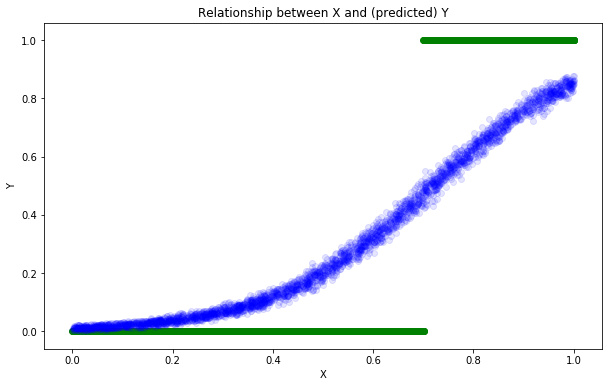

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, c='g')
plt.scatter(X_test, y1, c='b', alpha=0.1)
plt.title("Relationship between X and (predicted) Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()